# 1. Parse and extract the data

It is possible to use the Python library [Pandas](http://pandas.pydata.org) to read the dataset, which is given in [JSON](http://json.org) format:

In [1]:
import pandas

data = pandas.read_json('sample.txt')

data.shape

(1635, 7)

In [2]:
data.columns.tolist()

['complemento', 'dets', 'emit', 'ide', 'infAdic', 'total', 'versaoDocumento']

The obtained dataframe contains **1635 rows** corresponding to the total number of transactions, and **7 columns** identified by certain keys. A visual inspection of [sample.txt](https://raw.githubusercontent.com/jruizvar/TOTVSLabs/python-pandas/sample.txt) reveals the information behind every key, summarized in the following table:

| Key         | Description                |
|-------------|----------------------------|
|'complemento'| Total value per transaction|
| 'dets'      | Product name and value     |
| 'ide'       | Transaction time           |
| other keys  | Not considered             |

# 2. Consumption pattern

The revenue of the transactions can be arranged in a 2-dimensional matrix with the number of rows equal to the number of transactions and the number of columns equal to the number of products; a given cell **( i , j )** contains the income due to product **j** in the transaction **i**. The following code retrieves name-value pairs for each product in each transaction by implementing the method [map](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) and the syntax of [dict comprehensions](https://www.python.org/dev/peps/pep-0274/).

In [3]:
the_items = data['dets'].map(lambda items:{i['prod']['xProd']:i['prod']['vProd'] for i in items})

pandas.DataFrame(the_items.tolist()).describe()

,AGUA,BACARDI,BUFFET,BULE CHA,CAFE EXPRESSO,CAIPIRINHA,CAIPIROSKA,CERVEJA,CERVEJA LATA,CHA,...,SAKE,SASHIMI,SOBREMESA,SUCO,SUSHI ESPECIAL,TEMAKI,URAMAKI,VINHO,WHISKY,YAKISSOBA
count,405.000000,1.0,1635.000000,8.0,20.000000,7.000000,9.000000,91.000000,57.000000,83.000000,...,36.000000,3.000000e+00,16.000000,173.000000,43.000000,14.000000,1.0,1.0,16.00000,3.000000
mean,6.154815,7.0,46.191755,8.2,4.200000,15.428571,17.000000,7.590659,12.584211,1.265060,...,19.997222,2.160000e+01,11.925000,7.711850,18.734884,14.742857,15.0,19.0,19.40000,44.800000
std,4.529104,NaN,29.323780,0.0,1.831019,5.855400,4.974937,6.024104,9.490381,0.645516,...,11.931028,4.351168e-15,5.345091,5.110158,43.625740,4.194816,NaN,NaN,10.79611,2.771281
min,3.500000,7.0,7.680000,8.2,3.500000,12.000000,15.000000,4.500000,6.000000,1.000000,...,15.000000,2.160000e+01,6.000000,4.500000,6.500000,12.000000,15.0,19.0,12.50000,43.200000
25%,3.500000,7.0,26.470000,8.2,3.500000,12.000000,15.000000,4.500000,6.500000,1.000000,...,15.000000,2.160000e+01,8.000000,4.500000,6.500000,12.600000,15.0,19.0,12.50000,43.200000
50%,3.500000,7.0,36.630000,8.2,3.500000,12.000000,15.000000,4.500000,9.800000,1.000000,...,16.000000,2.160000e+01,12.000000,4.500000,9.800000,14.400000,15.0,19.0,12.50000,43.200000
75%,10.500000,7.0,58.510000,8.2,3.500000,18.000000,15.000000,9.000000,13.000000,1.000000,...,20.900000,2.160000e+01,12.000000,11.000000,14.000000,14.400000,15.0,19.0,25.00000,45.600000
max,31.500000,7.0,335.860000,8.2,10.500000,24.000000,30.000000,36.000000,52.000000,4.000000,...,83.600000,2.160000e+01,24.000000,27.000000,295.000000,28.800000,15.0,19.0,45.80000,48.000000


As a result, some statistical quantities describing the consumption pattern are displayed. From these results it is possible to conclude that **BUFFET** is the product with largest income.

# 3. Sales forecast for the next week

The given dataset contain transactions spanning a period of 3 weeks. For the next week, it is expected a number of transaction between 600 and 640, according to the trend of the past weeks.

In [4]:
the_time = data['ide'].map( lambda x: x['dhEmi']['$date'] )

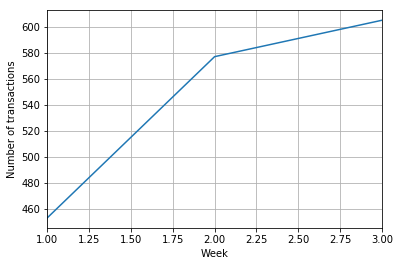

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

t = pandas.to_datetime(the_time)
t.groupby(t.dt.week).count().plot()
plt.xlabel('Week')
plt.ylabel('Number of transactions')
plt.grid(True)